In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [55]:
data = pd.read_csv('sales_data_sample.csv',encoding='latin1')

In [56]:
data = data.dropna(subset=['QUANTITYORDERED', 'SALES'])
 
X = data[['QUANTITYORDERED', 'SALES']]
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [57]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


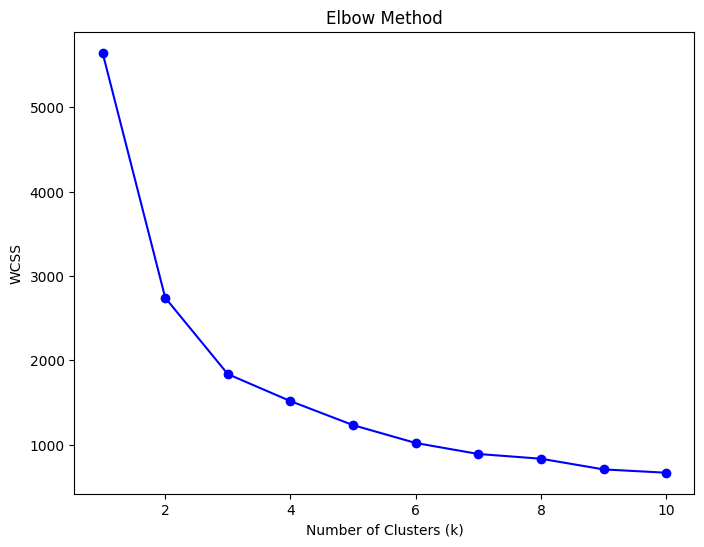

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

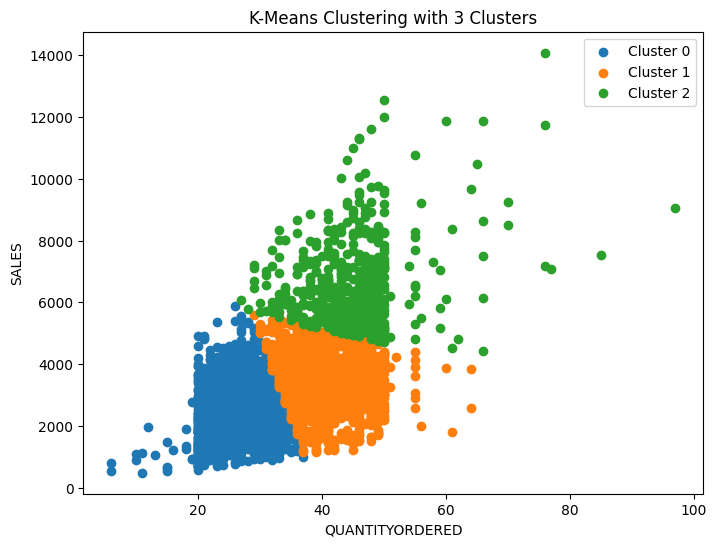

In [59]:
optimal_k = 3  # Choose optimal k based on the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(data[data['Cluster'] == cluster]['QUANTITYORDERED'],
                data[data['Cluster'] == cluster]['SALES'],
                label=f'Cluster {cluster}')

plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.legend()
plt.show()

In [60]:
from scipy.cluster.hierarchy import dendrogram,linkage

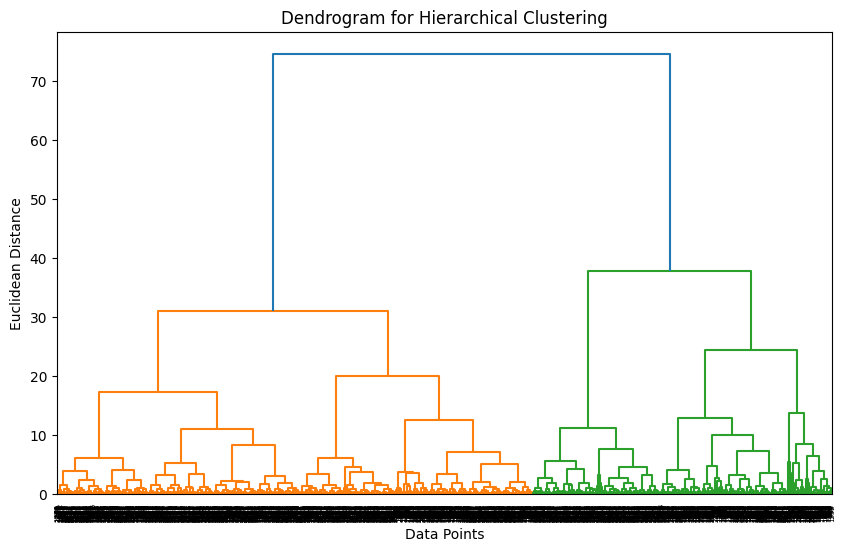

In [61]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [62]:
from sklearn.cluster import KMeans, AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster_Hierarchical'] = hierarchical.fit_predict(scaled_data)


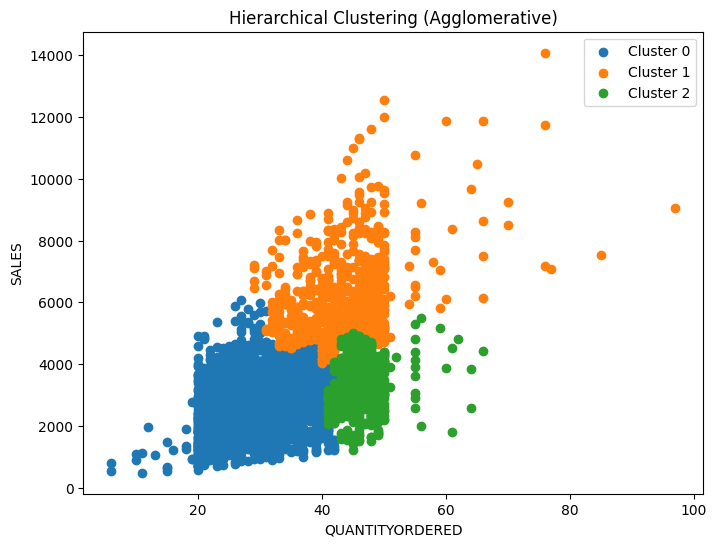

In [63]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(data[data['Cluster_Hierarchical'] == cluster]['QUANTITYORDERED'],
                data[data['Cluster_Hierarchical'] == cluster]['SALES'],
                label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering (Agglomerative)')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.legend()
plt.show()